<a href="https://colab.research.google.com/github/ktonon0401/AI-training/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install scikit-fuzzy

In [ ]:
#07550755

ValueError: ignored

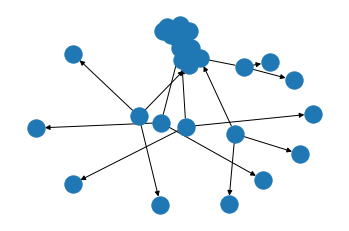

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,3,0.5),'taste')
envi = ctrl.Antecedent(np.arange(0,3,0.5),'envi')
budget = ctrl.Antecedent(np.arange(0,3,0.5),'budget')
user_review = ctrl.Antecedent(np.arange(0,3,0.5),'user_review')
location = ctrl.Antecedent(np.arange(0,3,0.5),'location')
score = ctrl.Consequent(np.arange(0,10,0.5),'score')
#Tạo membership tự động
taste_level=envi_level=budget_level=user_review_level=location_level=['less','medium','high']
taste.automf(names=taste_level)
envi.automf(names=envi_level)
budget.automf(names=budget_level)
user_review.automf(names=user_review_level)
location.automf(names=location_level)

#Tạo membership bằng tay
score['level1']=fuzz.trimf(score.universe,[0,1.5,3])
score['level2']=fuzz.trimf(score.universe,[1.5,3,4.5])
score['level3']=fuzz.trimf(score.universe,[3,4.5,6])
score['level4']=fuzz.trimf(score.universe,[4.5,6,7.5])
score['level5']=fuzz.trimf(score.universe,[6,7.5,9])

rule1=ctrl.Rule(taste['less']&envi['less']&budget['less']&user_review['less']&location['less'],score['level1'])
rule2=ctrl.Rule(taste['medium']&envi['less']&budget['less']&user_review['less']&location['less'],score['level1'])
rule3=ctrl.Rule(taste['medium']&envi['medium']&budget['less']&user_review['less']&location['less'],score['level2'])
rule4=ctrl.Rule(taste['medium']&envi['medium']&budget['medium']&user_review['less']&location['less'],score['level3'])
rule5=ctrl.Rule(taste['medium']&envi['medium']&budget['medium']&user_review['high']&location['less'],score['level3'])
rule6=ctrl.Rule(taste['high']&envi['medium']&budget['medium']&user_review['less']&location['less'],score['level4'])
rule7=ctrl.Rule(taste['medium']&envi['high']&budget['medium']&user_review['medium']&location['less'],score['level4'])
rule8=ctrl.Rule(taste['medium']&envi['high']&budget['high']&user_review['medium']&location['less'],score['level4'])
rule9=ctrl.Rule(taste['medium']&envi['high']&budget['medium']&user_review['high']&location['high'],score['level5'])
rule10=ctrl.Rule(taste['high']&envi['medium']&budget['high']&user_review['high']&location['high'],score['level5'])
rule11=ctrl.Rule(taste['high']&envi['high']&budget['high']&user_review['high']&location['high'],score['level5'])
rule12=ctrl.Rule(taste['high']&envi['high']&budget['high']&user_review['high']&location['high'],score['level5'])

rule1.view()
score_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11])
score_out = ctrl.ControlSystemSimulation(score_ctrl)
score_out.input['taste']=1
score_out.input['envi']=3
score_out.input['budget']=3
score_out.input['user_review']=3
score_out.input['location']=3
score_out.compute()
print(score_out.output['score'])
score.view(sim=score_out)

In [5]:
#34725337

ValueError: ignored

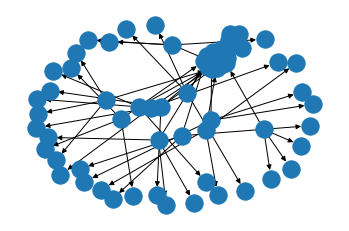

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fever=ctrl.Antecedent(np.arange(0,0.4,0.05),'fever')
headache=ctrl.Antecedent(np.arange(0,0.4,0.05),'headache')
nausea=ctrl.Antecedent(np.arange(0,0.4,0.05),'nausea')
vomiting=ctrl.Antecedent(np.arange(0,0.4,0.05),'vomiting')
jaundice=ctrl.Antecedent(np.arange(0,0.4,0.05),'jaundice')
enlarge_liver=ctrl.Antecedent(np.arange(0,0.4,0.05),'enlarge_liver')
joint_pain=ctrl.Antecedent(np.arange(0,0.4,0.05),'joint_pain')
body_weakness=ctrl.Antecedent(np.arange(0,0.4,0.05),'body_weakness')
dizziness=ctrl.Antecedent(np.arange(0,0.4,0.05),'dizziness')
loss_of_appetite=ctrl.Antecedent(np.arange(0,0.4,0.05),'loss_of_appetite')
mp=ctrl.Antecedent(np.arange(0,0.4,0.05),'mp')
conclusion=ctrl.Antecedent(np.arange(0,0.4,0.05),'conclusion')
malaria=ctrl.Consequent(np.arange(0,1.05,0.05),'malaria')

#Tạo membership tự động
level=['mild','moderate','severe','very_severe']
fever_lv=headache_lv=nausea_lv=vomiting_lv=jaundice_lv=enlarge_liver_lv=level
joint_pain_lv=body_weakness_lv=dizziness_lv=loss_of_appetite_lv=mp_lv=conclusion_lv=level

fever.automf(names=fever_lv)
headache.automf(names=headache_lv)
nausea.automf(names=nausea_lv)
vomiting.automf(names=vomiting_lv)
jaundice.automf(names=jaundice_lv)
enlarge_liver.automf(names=enlarge_liver_lv)
joint_pain.automf(names=joint_pain_lv)
body_weakness.automf(names=body_weakness_lv)
dizziness.automf(names=dizziness_lv)
loss_of_appetite.automf(names=loss_of_appetite_lv)
mp.automf(names=mp_lv)
conclusion.automf(names=conclusion_lv)

#Tạo membership bằng tay
malaria['mild']=fuzz.trimf(malaria.universe,[0.1,0.2,0.3])
malaria['moderate']=fuzz.trimf(malaria.universe,[0.3,0.45,0.6])
malaria['severe']=fuzz.trimf(malaria.universe,[0.6,0.7,0.8])
malaria['very_severe']=fuzz.trimf(malaria.universe,[0.8,0.9,1])

rule1 = ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']
                  &dizziness['severe']&loss_of_appetite['mild']&mp['mild']&
                  conclusion['mild'],malaria['mild'])
rule2 = ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['severe']&loss_of_appetite['moderate']&mp['moderate']&
                  conclusion['moderate'],malaria['mild'])
rule3 = ctrl.Rule(fever['severe']&headache['moderate']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']
                  &dizziness['severe']&loss_of_appetite['severe']&mp['moderate']&
                  conclusion['severe'],malaria['mild'])
rule4 = ctrl.Rule(fever['very_severe']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']
                  &enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']
                  &dizziness['mild']&loss_of_appetite['mild']&mp['severe']&
                  conclusion['very_severe'],malaria['moderate'])

rule1.view()
malaria_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])
mlr = ctrl.ControlSystemSimulation(malaria_ctrl)
mlr.input['fever']=0.3
mlr.input['headache']=0.2
mlr.input['nausea']=0.3
mlr.input['vomiting']=0.3
mlr.input['jaundice']=0.1
mlr.input['enlarge_liver']=0.2
mlr.input['joint_pain']=0.3
mlr.input['body_weakness']=0.2
mlr.input['dizziness']=0.3
mlr.input['loss_of_appetite']=0.1
mlr.input['mp']=0.2
mlr.input['conclusion']=0.2
mlr.compute()
print(mlr.output['malaria'])
malaria.view(sim=mlr)